<a href="https://colab.research.google.com/github/AnnaVeller/detect-license-plates/blob/master/Detect_license_plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install asyncio

In [3]:
!pip install cython
!pip install matplotlib
!pip install setuptools
!pip install numpy
!pip install Keras==2.2.*
!pip install imgaug
#!pip install tensorflow==1.15.2
!pip install tensorflow-gpu==1.15.2
!pip install opencv_python
!pip install imutils
!pip install scikit_image
!pip install jupyter

!pip install GitPython
!pip install pycocotools
!pip install tqdm

     |████████████████████████████████| 337kB 4.7MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 411.0MB 41kB/s 
     |████████████████████████████████| 512kB 54.4MB/s 
     |████████████████████████████████| 3.8MB 48.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=99cf80d0ec153a74c2bfed42e913ee05119c10d662a5476506c9008a95c3b7ff
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-est

In [4]:
!pip install Nomeroff-net-gpu

     |████████████████████████████████| 51kB 3.0MB/s 


In [5]:
!pip install mrcnn

     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54932 sha256=a012647c99c3f4875df5e8cd8f930b7fa6814769e350068ad602f11456cd4048
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn


In [6]:
import os
import numpy as np
import sys
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [7]:
NOMEROFF_NET_DIR = os.path.abspath("/content/")
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')
sys.path.append(NOMEROFF_NET_DIR)
from NomeroffNet import filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing, textPostprocessingAsync

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel("latest")

rectDetector = RectDetector()

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector.get_static_module("ru")()
textDetector.load("latest")

Using TensorFlow backend.
mask_rcnn_numberplate_0640_2019_06_24.h5: 256MB [17:14, 247kB/s]                           





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.






numberplate_options_2019_06_27.h5: 78.7MB [05:01, 261kB/s]                            



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





anpr_ocr_ru_3-cpu.h5: 19.5MB [01:06, 294kB/s]                            


/usr/local/lib/python3.6/dist-packages/NomeroffNet/Base/OCR.py:195: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("th..., outputs=Tensor("so...)`
  self.MODEL = Model(input=net_inp, output=net_out)


In [8]:
#files = os.listdir("/content/test")
#files.sort()
#names = list(map(lambda x: os.path.splitext(x)[0], files))
#pic = list(map(lambda x: "/content/test/" + x, files))
#print(pic)
#print(names)

In [8]:
#!rm -rf /content/test
!mkdir test
%cd test/
from google.colab import files
uploaded = files.upload()
pic = []
names = []
for fn in uploaded.keys():
  print('User uploaded file «{name}» with length {length} bytes'.format(
  name=fn, length=len(uploaded[fn])))
  pic.append("/content/test/" + fn)
  #names.append(fn.split('.')[0])
  names.append('A001MP05')
print(pic)
print(names)
%cd ../ 

/content/test


Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpeg to 7.jpeg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg
Saving 17.jpg to 17.jpg
Saving 18.jpg to 18.jpg
Saving 19.jpg to 19.jpg
Saving 20.jpg to 20.jpg
Saving 21.jpg to 21.jpg
Saving 22.jpg to 22.jpg
Saving 23.jpg to 23.jpg
Saving 24.jpg to 24.jpg
User uploaded file «1.jpg» with length 113341 bytes
User uploaded file «2.jpg» with length 150931 bytes
User uploaded file «3.jpg» with length 159834 bytes
User uploaded file «4.jpg» with length 163945 bytes
User uploaded file «5.jpg» with length 160505 bytes
User uploaded file «6.jpg» with length 151619 bytes
User uploaded file «7.jpeg» with length 120463 bytes
User uploaded file «8.jpg» with length 151750 bytes
User uploaded file «9.j

360


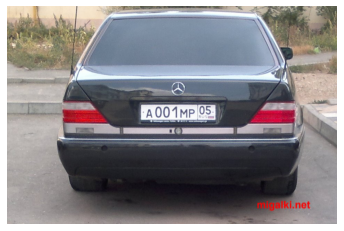

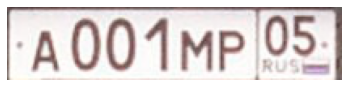

real:  A001MP05
predict:  ['A001MP05'] True



345


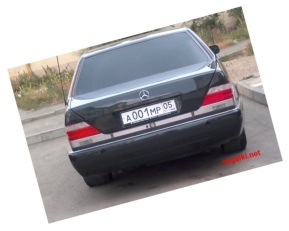

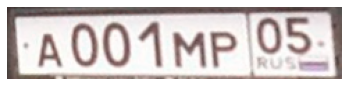

real:  A001MP05
predict:  ['A001MP05'] True



330


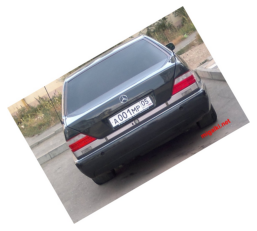

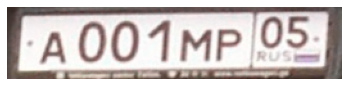

real:  A001MP05
predict:  ['A001MP05'] True



315


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


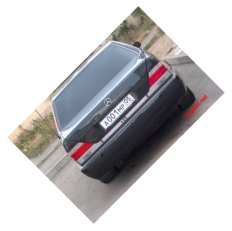

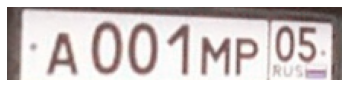

real:  A001MP05
predict:  ['A001MP05'] True



300


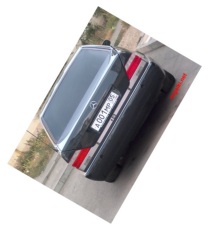

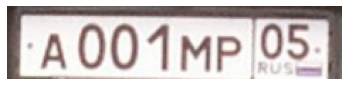

real:  A001MP05
predict:  ['A001MP05'] True



285


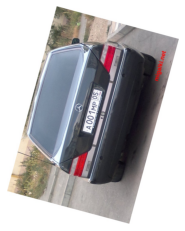

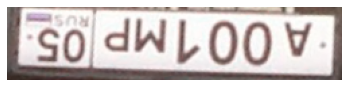

real:  A001MP05
predict:  ['0PY00Y'] False



270


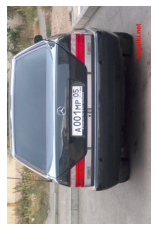

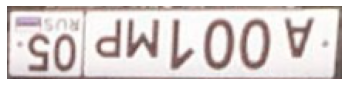

real:  A001MP05
predict:  ['OH00'] False



255


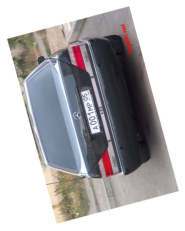

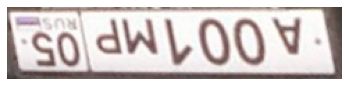

real:  A001MP05
predict:  ['BAP001'] False



240


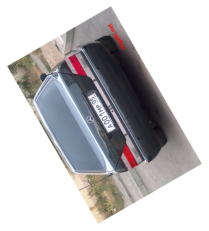

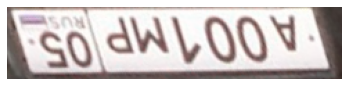

real:  A001MP05
predict:  ['AAY003'] False



225


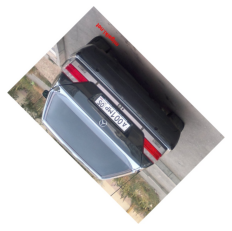

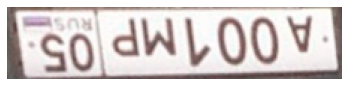

real:  A001MP05
predict:  ['EOA4001'] False



210


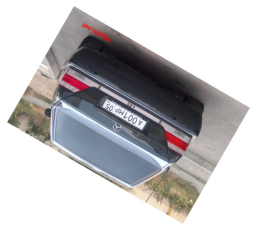

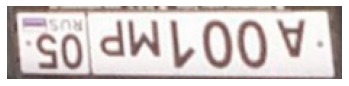

real:  A001MP05
predict:  ['OA00Y'] False



195


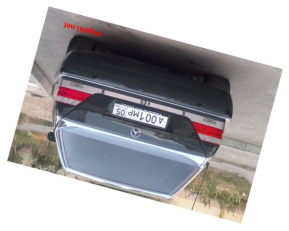

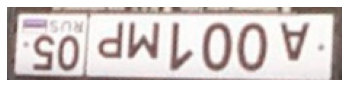

real:  A001MP05
predict:  ['EH00Y'] False



180


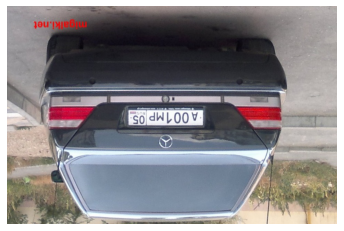

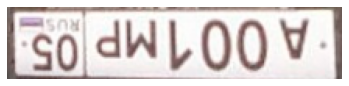

real:  A001MP05
predict:  ['EOH00Y'] False



165


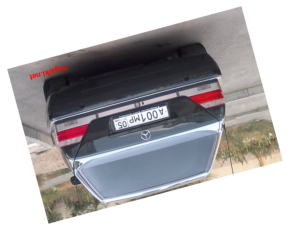

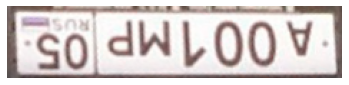

real:  A001MP05
predict:  ['O00Y'] False



150


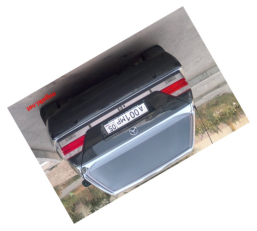

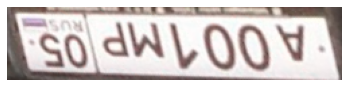

real:  A001MP05
predict:  ['B600A'] False



135


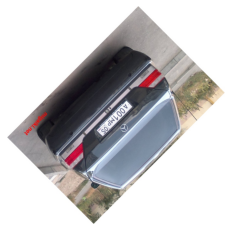

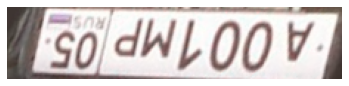

real:  A001MP05
predict:  ['EPY000'] False



120


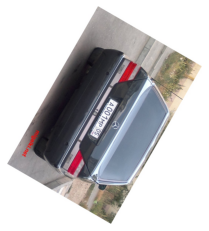

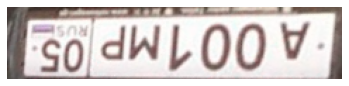

real:  A001MP05
predict:  ['O300Y'] False



105


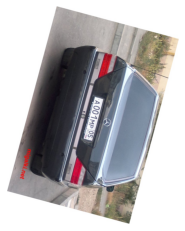

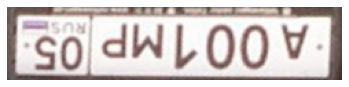

real:  A001MP05
predict:  ['BOH00Y'] False



90


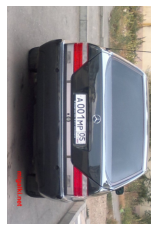

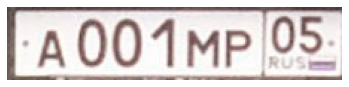

real:  A001MP05
predict:  ['A001MP05'] True



75


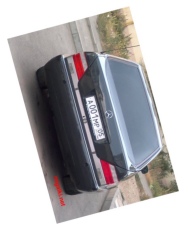

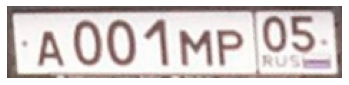

real:  A001MP05
predict:  ['A001MP05'] True



60


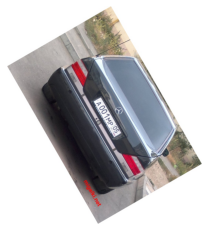

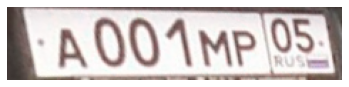

real:  A001MP05
predict:  ['A001MP05'] True



45


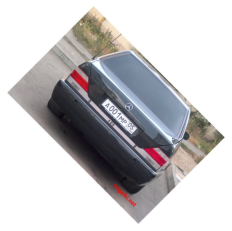

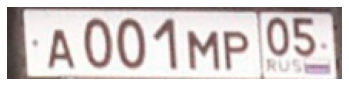

real:  A001MP05
predict:  ['A001MP05'] True



30


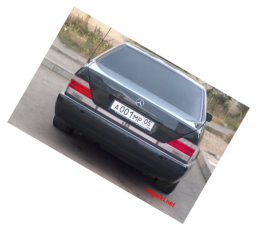

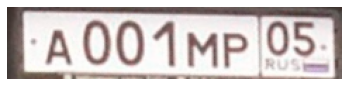

real:  A001MP05
predict:  ['A001MP05'] True



15


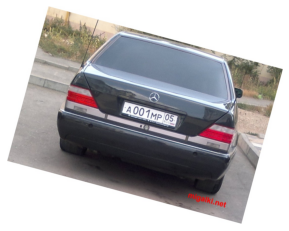

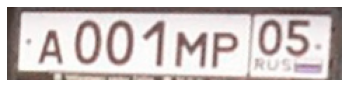

real:  A001MP05
predict:  ['A001MP05'] True



 right detect  | 11
 ---------------------
 all detect    | 24
 ---------------------
 right percent | 45.833333 %


In [10]:
right_detect = 0
angle=360
for i in range(len(pic)):
    print(angle)
    angle = angle-15
    img_path = pic[i]
    # Detect numberplate
    img = mpimg.imread(img_path)
    NP = nnet.detect([img])

    # Generate image mask.
    cv_img_masks = filters.cv_img_mask(NP)

    # Detect points.
    arrPoints = rectDetector.detect(cv_img_masks)
    zones = rectDetector.get_cv_zonesBGR(img, arrPoints)

    # find standart
    regionIds, stateIds, countLines = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)

    # find text with postprocessing by standart
    textArr = textDetector.predict(zones)
    textArr = textPostprocessing(textArr, regionNames)
    state = False
    for k in range(len(textArr)):
        if names[i] == textArr[k]:
            state = True
            right_detect = right_detect + 1
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    #print(arrPoints)
    for zone, points in zip(zones, arrPoints):
            plt.axis("off")
            plt.imshow(zone)
            plt.show()  
    print("real: ", names[i])
    print("predict: ", textArr, state)
    print('\n\n')
print(" right detect  | %d\n ---------------------\n all detect    | %d\n ---------------------\n right percent | %f" %(right_detect,len(pic),right_detect/len(pic)*100),"%") 

In [11]:
print(" right detect  | %d\n ---------------------\n all detect    | %d\n ---------------------\n right percent | %f"
%(right_detect,len(pic),right_detect/len(pic)*100),"%") 

 right detect  | 36
 ---------------------
 all detect    | 67
 ---------------------
 right percent | 53.731343 %
